## visualize all 36 results

Data file for Babel-9B-Chat (Korean-English, KoreanPrompt) not found. Skipping...


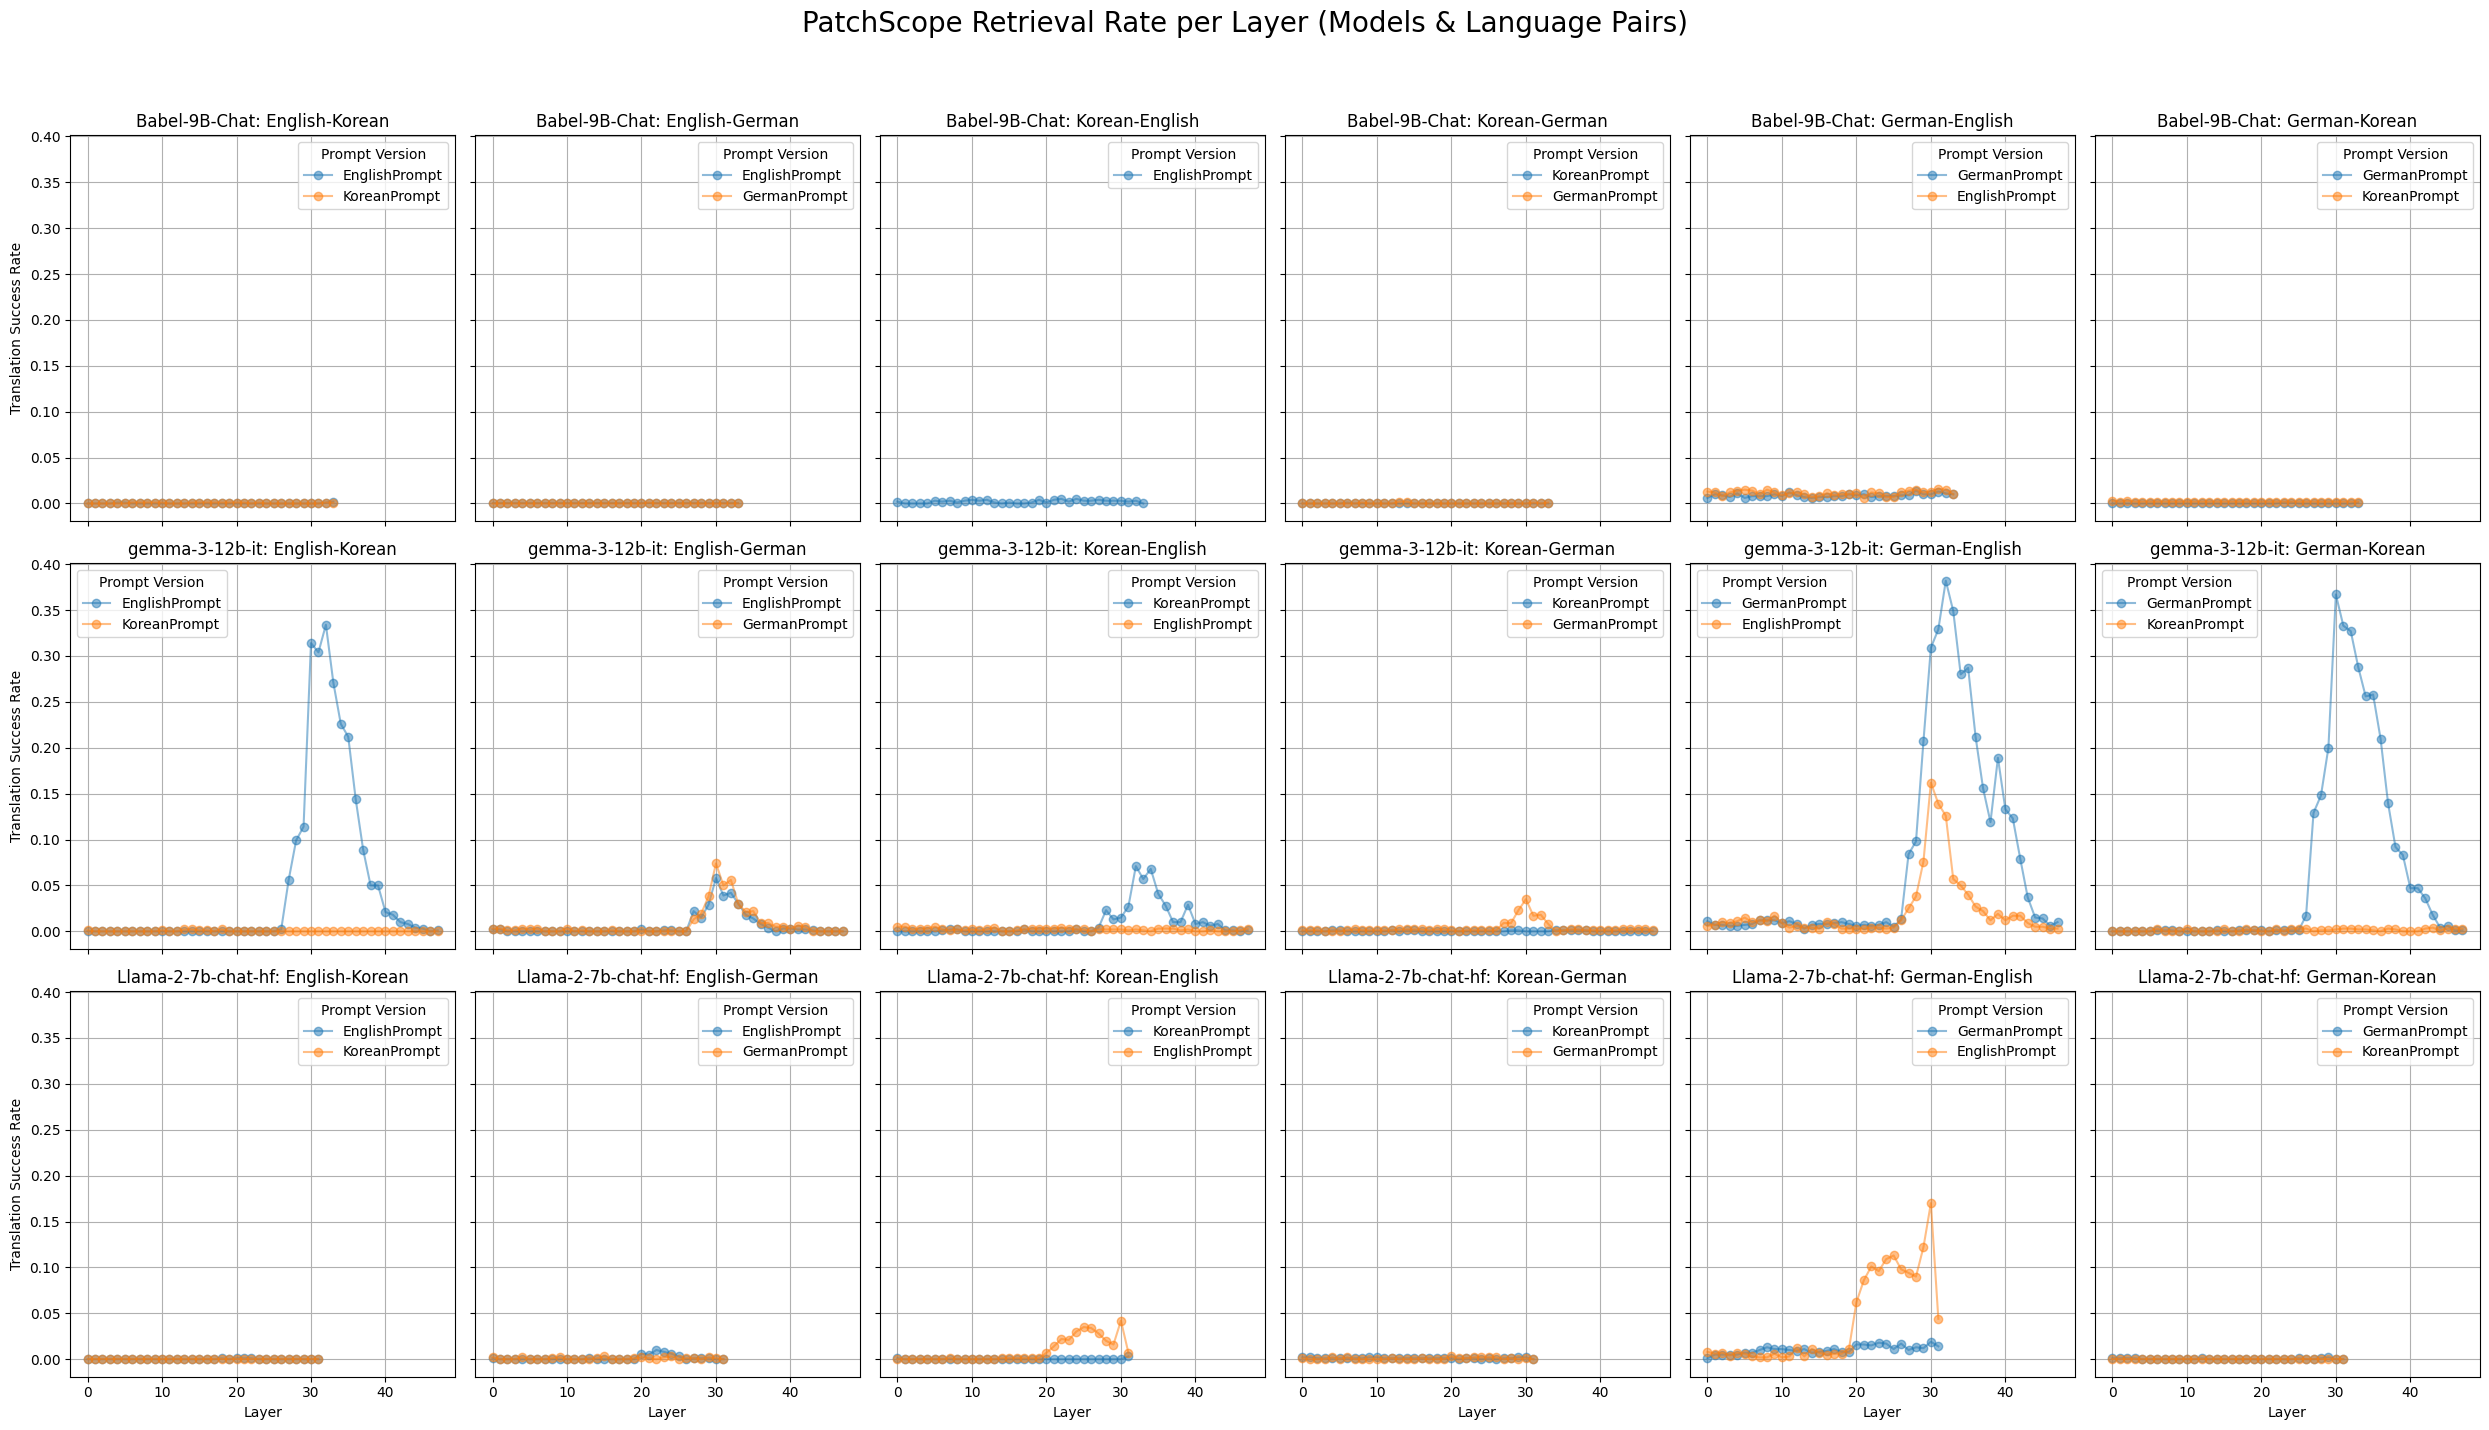

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval

# Define models, languages, and prompt versions
models = ["Tower-Babel/Babel-9B-Chat", "google/gemma-3-12b-it", "meta-llama/Llama-2-7b-chat-hf"]
languages = ["English", "Korean", "German"]
language_pairs = [(src, tgt) for src in languages for tgt in languages if src != tgt]

# Define colors and line styles for visualization

# Create subplots
fig, axes = plt.subplots(len(models), len(language_pairs), figsize=(25, 15), sharex=True, sharey=True)
fig.suptitle("PatchScope Retrieval Rate per Layer (Models & Language Pairs)", fontsize=20)

for i, model in enumerate(models):
    model_short = model.split("/")[-1]
    for j, (src, tgt) in enumerate(language_pairs):
        ax = axes[i, j]
        prompt_versions = [f"{src}Prompt", f"{tgt}Prompt"]
        for prompt_version in prompt_versions:
            try:
                # Load dataset
                data_df = pd.read_csv(f"/home/hyujang/multilingual-inner-lexicon/data/RQ2/MUSE/{src}_{tgt}_1000.csv")
                data_df[tgt] = data_df[tgt].apply(literal_eval)
                data_dict = dict(zip(data_df[src], data_df[tgt]))

                # Load output
                output_path = f"/home/hyujang/multilingual-inner-lexicon/output/RQ2/PatchScope/{model_short}_{src}_to_{tgt}_{prompt_version}.csv"
                output_df = pd.read_csv(output_path)
                output_df["patchscope_result"] = output_df["patchscope_result"].str.replace("\n", " ")

                # Compute retrieval rate
                output_df['retrieved'] = output_df.apply(
                    lambda row: any(value in str(row['patchscope_result']) for value in data_dict.get(row['word'], [])),
                    axis=1
                )
                retrieval_rate_by_layer = output_df.groupby('layer')['retrieved'].mean()

                # Plot retrieval rate
                ax.plot(
                    retrieval_rate_by_layer.index,
                    retrieval_rate_by_layer.values,
                    marker='o',
                    label=f"{prompt_version}",
                    alpha=0.5,
                    # linestyle=prompt_styles[prompt_version]
                )
            except FileNotFoundError:
                print(f"Data file for {model_short} ({src}-{tgt}, {prompt_version}) not found. Skipping...")

        # Set subplot title and labels
        ax.set_title(f"{model_short}: {src}-{tgt}")
        if i == len(models) - 1:
            ax.set_xlabel("Layer")
        if j == 0:
            ax.set_ylabel("Translation Success Rate")
        ax.grid(True)
        ax.legend(title="Prompt Version")

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for title
plt.show()

## visualize all for a single language pair

Data file for Babel-9B-Chat with KoreanPrompt not found. Skipping...


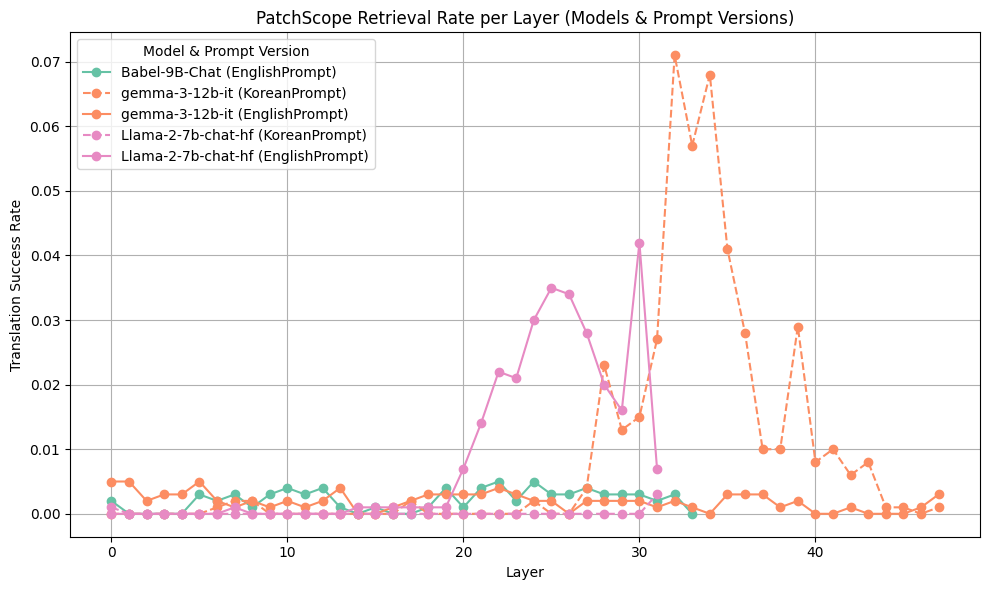

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval

SOURCE_LANGUAGE = "Korean"
TARGET_LANGUAGE = "English"

# Define models and prompt versions
models = ["Tower-Babel/Babel-9B-Chat", "google/gemma-3-12b-it", "meta-llama/Llama-2-7b-chat-hf"]
prompt_versions = [f"{SOURCE_LANGUAGE}Prompt", f"{TARGET_LANGUAGE}Prompt"]

# Define colors and line styles for visualization
model_colors = {
    "Babel-9B-Chat": "#66c2a5",
    "gemma-3-12b-it": "#fc8d62",
    "Llama-2-7b-chat-hf": "#e78ac3"
}
prompt_styles = {
    f"{SOURCE_LANGUAGE}Prompt": "--",
    f"{TARGET_LANGUAGE}Prompt": "-"
}

plt.figure(figsize=(10, 6))

# Iterate through models and prompt versions
for model in models:
    model_short = model.split("/")[-1]
    for prompt_version in prompt_versions:
        try:
            data_df = pd.read_csv(f"/home/hyujang/multilingual-inner-lexicon/data/RQ2/MUSE/{SOURCE_LANGUAGE}_{TARGET_LANGUAGE}_1000.csv")
            data_df[f"{TARGET_LANGUAGE}"] = data_df[f"{TARGET_LANGUAGE}"].apply(literal_eval)
            data_dict = dict(zip(data_df[f"{SOURCE_LANGUAGE}"], data_df[f"{TARGET_LANGUAGE}"]))
            
            output_df = pd.read_csv(f"/home/hyujang/multilingual-inner-lexicon/output/RQ2/PatchScope/{model_short}_{SOURCE_LANGUAGE}_to_{TARGET_LANGUAGE}_{prompt_version}.csv")
            output_df["patchscope_result"] = output_df["patchscope_result"].str.replace("\n"," ")
            
            output_df['retrieved'] = output_df.apply(
                lambda row: any(value in str(row['patchscope_result']) for value in data_dict.get(row['word'], [])),
                axis=1
            )

            retrieval_rate_by_layer = output_df.groupby('layer')['retrieved'].mean()
            
            # Plot retrieval rate
            plt.plot(
                retrieval_rate_by_layer.index,
                retrieval_rate_by_layer.values,
                marker='o',
                label=f"{model_short} ({prompt_version})",
                color=model_colors.get(model_short, "black"),
                linestyle=prompt_styles.get(prompt_version, "-")
            )
        except FileNotFoundError:
            print(f"Data file for {model_short} with {prompt_version} not found. Skipping...")

# Add labels, title, and legend
plt.xlabel("Layer")
plt.ylabel("Translation Success Rate")
plt.title("PatchScope Retrieval Rate per Layer (Models & Prompt Versions)")
plt.grid(True)
plt.legend(title="Model & Prompt Version")
plt.tight_layout()
plt.show()

## visualize a single result

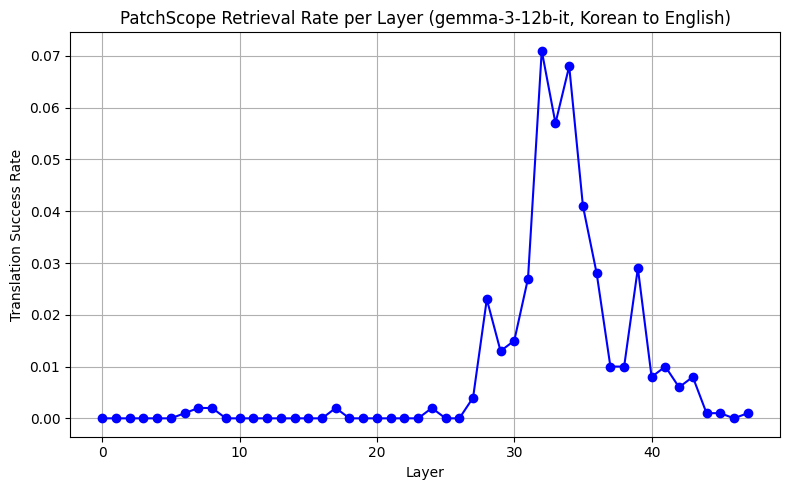

In [ ]:
import pandas as pd
from ast import literal_eval

SOURCE_LANGUAGE = "English"
TARGET_LANGUAGE = "Korean"
# MODEL_NAME = "google/gemma-3-12b-it"
# MODEL_NAME = "meta-llama/Llama-2-7b-chat-hf"
MODEL_NAME = "Tower-Babel/Babel-9B-Chat"
MODEL_NAME = MODEL_NAME.split("/")[-1]  # Extract model name for output file

data_df = pd.read_csv(f"/home/hyujang/multilingual-inner-lexicon/data/RQ2/MUSE/{SOURCE_LANGUAGE}-{TARGET_LANGUAGE}_1000.csv")
data_df[f"{TARGET_LANGUAGE}"] = data_df[f"{TARGET_LANGUAGE}"].apply(literal_eval)
output_df = pd.read_csv(f"/home/hyujang/multilingual-inner-lexicon/output/RQ2/PatchScope/{MODEL_NAME}_{SOURCE_LANGUAGE}_to_{TARGET_LANGUAGE}_EnglishPrompt_withOriginalCode.csv")
output_df["patchscope_result"] = output_df["patchscope_result"].str.replace("\n"," ")
data_dict = dict(zip(data_df[f"{SOURCE_LANGUAGE}"], data_df[f"{TARGET_LANGUAGE}"]))
output_df['retrieved'] = output_df.apply(
    lambda row: any(value in str(row['patchscope_result']) for value in data_dict.get(row['word'], [])),
    axis=1
)

retrieval_rate = output_df['retrieved'].mean()

# print(output_df[output_df['retrieved']]["word"].value_counts())
print(output_df[output_df['retrieved']]["word"].unique())
en_prompt_true_list = output_df[output_df['retrieved']]["word"].unique()

import matplotlib.pyplot as plt
# Group by layer and compute retrieval rate
retrieval_rate_by_layer = output_df.groupby('layer')['retrieved'].mean()

# Plot the retrieval rate
plt.figure(figsize=(8, 5))
plt.plot(retrieval_rate_by_layer.index, retrieval_rate_by_layer.values, marker='o', linestyle='-', color='b')
plt.xlabel("Layer")
plt.ylabel("Translation Success Rate")
plt.title(f"PatchScope Retrieval Rate per Layer ({MODEL_NAME}, {SOURCE_LANGUAGE} to {TARGET_LANGUAGE})")
plt.grid(True)
plt.tight_layout()
plt.show()

## visualize specific files

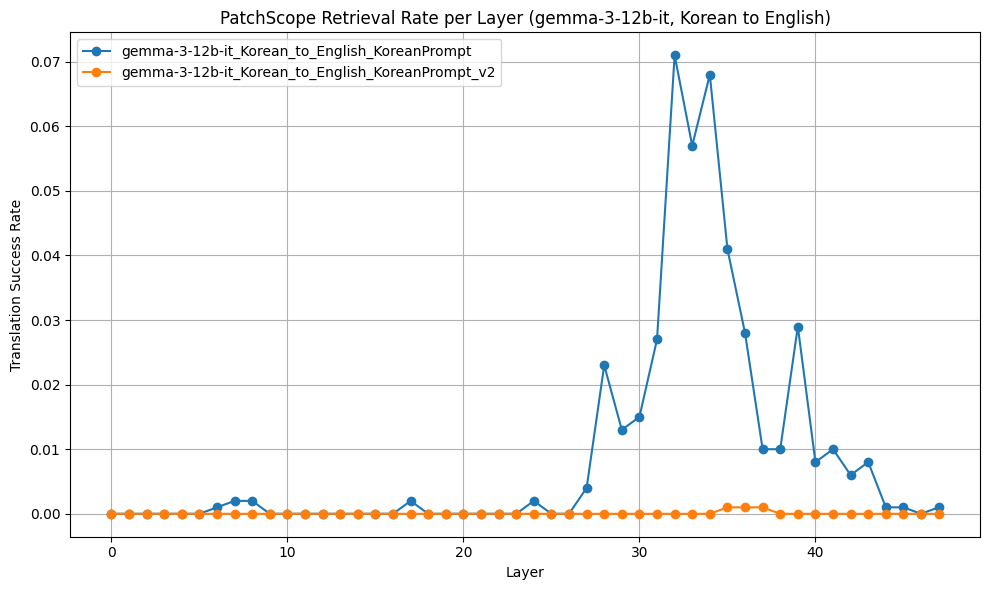

In [93]:
MODEL_NAME = "gemma-3-12b-it"

output_paths = [f"/home/hyujang/multilingual-inner-lexicon/output/RQ2/PatchScope/{MODEL_NAME}_{SOURCE_LANGUAGE}_to_{TARGET_LANGUAGE}_KoreanPrompt.csv", 
                f"/home/hyujang/multilingual-inner-lexicon/output/RQ2/PatchScope/{MODEL_NAME}_{SOURCE_LANGUAGE}_to_{TARGET_LANGUAGE}_KoreanPrompt_v2.csv",
                # f"/home/hyujang/multilingual-inner-lexicon/output/RQ2/PatchScope/{MODEL_NAME}_{SOURCE_LANGUAGE}_to_{TARGET_LANGUAGE}_v3.csv"
                ]


plt.figure(figsize=(10, 6))

for output_path in output_paths:
    data_df = pd.read_csv(f"/home/hyujang/multilingual-inner-lexicon/data/RQ2/MUSE/{SOURCE_LANGUAGE}-{TARGET_LANGUAGE}_1000.csv")
    data_df[f"{TARGET_LANGUAGE}"] = data_df[f"{TARGET_LANGUAGE}"].apply(literal_eval)
    output_df = pd.read_csv(output_path)
    output_df["patchscope_result"] = output_df["patchscope_result"].str.replace("\n"," ")
    data_dict = dict(zip(data_df[f"{SOURCE_LANGUAGE}"], data_df[f"{TARGET_LANGUAGE}"]))
    output_df['retrieved'] = output_df.apply(
        lambda row: any(value in str(row['patchscope_result']) for value in data_dict.get(row['word'], [])),
        axis=1
    )

    retrieval_rate_by_layer = output_df.groupby('layer')['retrieved'].mean()
    # print(f"{output_path.split('/')[-1]}")
    plt.plot(
    retrieval_rate_by_layer.index,
    retrieval_rate_by_layer.values,
    marker='o',
    # label="hi"
    label=f"{output_path.split('/')[-1].replace(".csv","")}",  # Use the file name as label
    # color=language_colors.get(lang, "black"),  # Use the color for the language
    # linestyle=model_styles.get(model_short, "dashdot"),  # Use the line style for the model
        )


plt.xlabel("Layer")
plt.ylabel("Translation Success Rate")
plt.title(f"PatchScope Retrieval Rate per Layer ({MODEL_NAME}, {SOURCE_LANGUAGE} to {TARGET_LANGUAGE})")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()